In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [60]:
data=pd.read_csv("hospitalopti.csv")

In [61]:
data.head()

,SNO,D.O.A,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,DURATION OF STAY,OUTCOME,SEVERE ANAEMIA,ATYPICAL CHEST PAIN,HEART FAILURE,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,CARDIOGENIC SHOCK,PULMONARY EMBOLISM
0,1,04-01-2021,81,M,R,E,3,DISCHARGE,1,1,0,1,1,1,1,1
1,2,04-01-2021,65,M,R,E,5,DISCHARGE,1,1,1,1,1,1,1,1
2,3,04-01-2021,53,M,U,E,3,DISCHARGE,1,1,0,1,1,1,1,1
3,4,04-01-2021,67,F,U,E,8,DISCHARGE,1,1,1,1,1,1,1,1
4,5,04-01-2021,60,F,U,E,21,DISCHARGE,1,1,1,1,1,1,1,1


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15741 entries, 0 to 15740
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   SNO                              15741 non-null  int64 
 1   D.O.A                            15741 non-null  object
 2   AGE                              15741 non-null  int64 
 3   GENDER                           15741 non-null  object
 4   RURAL                            15741 non-null  object
 5   TYPE OF ADMISSION-EMERGENCY/OPD  15741 non-null  object
 6   DURATION OF STAY                 15741 non-null  int64 
 7   OUTCOME                          15741 non-null  object
 8   SEVERE ANAEMIA                   15741 non-null  int64 
 9   ATYPICAL CHEST PAIN              15741 non-null  int64 
 10  HEART FAILURE                    15741 non-null  int64 
 11  UTI                              15741 non-null  int64 
 12  NEURO CARDIOGENIC SYNCOPE       

In [65]:
categorical_columns = ['D.O.A','GENDER','RURAL','TYPE OF ADMISSION-EMERGENCY/OPD','DURATION OF STAY','OUTCOME']


In [66]:
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [67]:
data.to_csv("preprocessed_dataset2.csv", index=False)

In [68]:
print(data.head())

   SNO  AGE  SEVERE ANAEMIA  ATYPICAL CHEST PAIN  HEART FAILURE  UTI   
0    1   81               1                    1              0    1  \
1    2   65               1                    1              1    1   
2    3   53               1                    1              0    1   
3    4   67               1                    1              1    1   
4    5   60               1                    1              1    1   

   NEURO CARDIOGENIC SYNCOPE  ORTHOSTATIC  CARDIOGENIC SHOCK   
0                          1            1                  1  \
1                          1            1                  1   
2                          1            1                  1   
3                          1            1                  1   
4                          1            1                  1   

   PULMONARY EMBOLISM  ...  DURATION OF STAY_48  DURATION OF STAY_49   
0                   1  ...                False                False  \
1                   1  ...            

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [73]:
data = pd.read_csv("preprocessed_dataset2.csv")

In [74]:
X = data.drop("OUTCOME_DISCHARGE", axis=1)  # Replace "TARGET_COLUMN" with the name of your target variable
y = data["OUTCOME_DISCHARGE"]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
model = LogisticRegression()

In [77]:
model.fit(X_train, y_train)

LogisticRegression()

In [78]:
y_pred = model.predict(X_test)

In [79]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9422038742457923

Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.59      0.74       436
        True       0.94      1.00      0.97      2713

    accuracy                           0.94      3149
   macro avg       0.96      0.79      0.85      3149
weighted avg       0.95      0.94      0.94      3149


Confusion Matrix:
 [[ 257  179]
 [   3 2710]]


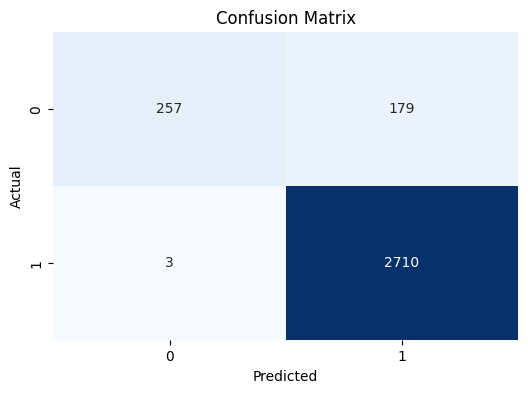

In [80]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

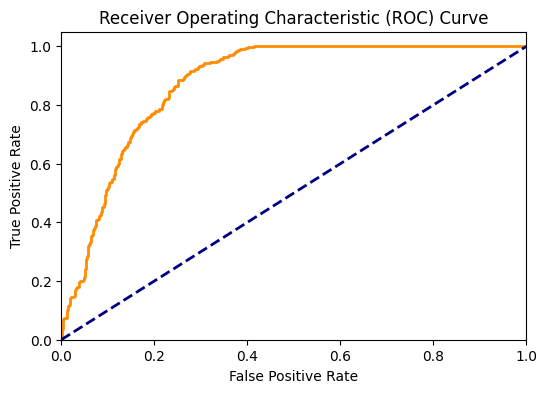

In [81]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()